In [8]:

import pandas as pd
import numpy as np
import random
import seaborn as sns

import matplotlib.pyplot as plt


# k-nearest neighbors

This dataset was obtained from https://archive.ics.uci.edu/ml/datasets/Heart+Disease (this is a great resource for datasets to try machine learning on). It has data on patients that are and are not diagnosed with heart disease.

The attributes are:
* age: age in years 
* sex: sex (1 = male; 0 = female) 
* cp: chest pain type 
 * -- Value 1: typical angina 
 * -- Value 2: atypical angina 
 * -- Value 3: non-anginal pain 
 * -- Value 4: asymptomatic 
* trestbps: resting blood pressure (in mm Hg on admission to the hospital) 
* chol: serum cholestoral in mg/dl 
* fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
* restecg: resting electrocardiographic results 
 * -- Value 0: normal 
 * -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
 * -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
* thalach: maximum heart rate achieved 
* exang: exercise induced angina (1 = yes; 0 = no) 
* oldpeak = ST depression induced by exercise relative to rest 
* slope: the slope of the peak exercise ST segment 
 * -- Value 1: upsloping 
 * -- Value 2: flat 
 * -- Value 3: downsloping 
* ca: number of major vessels (0-3) colored by flourosopy 
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect 
* num: diagnosis of heart disease (angiographic disease status) 
 * -- Value 0: absence.
 * -- Value 1,2,3,4: presence of heart disease


# Explore the data

Read in the data, modify the dependent variable name and plot a histogram of the ages of patients, both healthy and those with heart disease.

In [9]:
# Comma-separated values
df = pd.read_csv('core/cleveland.csv')



In [10]:
df

# Rename 'num' column to 'disease' and make it binary
df['disease'] = df.num.apply(lambda x: min(x,1))
df 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,disease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


Text(0.5, 1.0, 'unhealthy')

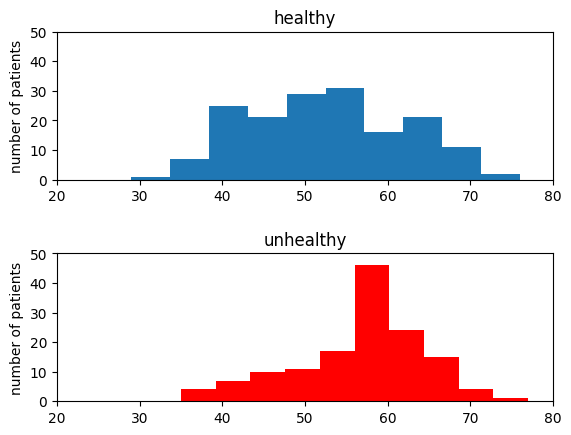

In [11]:
# sns.displot(data=df, x='age', hue='disease')

fig, (ax1, ax2) = plt.subplots(2,1)
fig.subplots_adjust(hspace=0.5)

ax1.hist(df[df.disease == 0].age)
ax1.set_ylabel('number of patients')
ax1.set_xlim(20, 80)
ax1.set_ylim(0, 50)
ax1.set_title('healthy')

ax2.hist(df[df.disease == 1].age, color='red')
ax2.set_ylabel('number of patients')
ax2.set_xlim(20, 80)
ax2.set_ylim(0, 50)
ax2.set_title('unhealthy')

# k-nearest neighbors - first try

Try it first on age, using the scikit-learn package. This code simply looks for the five patients with ages closest to a given age, then prints how many of those patients are healthy and how many have heart disease.

In [12]:
from sklearn.neighbors import NearestNeighbors

# Use knn on age. First create a nearest neighbors object.
nn = NearestNeighbors(n_neighbors=5, metric='euclidean', algorithm='auto')

X = [[x] for x in df.age]
# df.age
X

fit = nn.fit(X)

distances, indices = fit.kneighbors([[70]])
distances, indices

nbrs = df.iloc[indices[0]]
nbrs

healthy = nbrs[nbrs.disease == 0].count().disease
sick = nbrs[nbrs.disease == 1].count().disease

print('healthy: {}\nsick: {}'.format(healthy, sick))


healthy: 1
sick: 4


# multiple dimensions

Now run knn on a patient from the database using an additional dimension, or attribute: trestbps (resting blood pressure).

**Warning** The raw data used is not standardized, so differences in the magnitude of change between the different attributes could cause one attribute to unduly influence another. Use standardized data for knn.

In [13]:
# Use knn on age. First create a nearest neighbors object.
nn = NearestNeighbors(n_neighbors=5, metric='euclidean', algorithm='auto')

# standardize age and bp
df['age_s'] = (df.age - df.age.mean())/df.age.std()
df['trestbps_s'] = (df.trestbps - df.trestbps.mean())/df.trestbps.std()
# display(df.age_s)

X = df[['age_s', 'trestbps_s']].values
# df.age
X

fit = nn.fit(X)

distances, indices = fit.kneighbors([[70, 140]])
distances, indices

nbrs = df.iloc[indices[0]]
nbrs

healthy = nbrs[nbrs.disease == 0].count().disease
sick = nbrs[nbrs.disease == 1].count().disease

print('healthy: {}\nsick: {}'.format(healthy, sick))
display(nbrs)

healthy: 1
sick: 4


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,disease,age_s,trestbps_s
126,56.0,0.0,4.0,200.0,288.0,1.0,2.0,133.0,1.0,4.0,3.0,2.0,7.0,3,1,0.172709,3.881319
83,68.0,1.0,3.0,180.0,274.0,1.0,2.0,150.0,1.0,1.6,2.0,0.0,7.0,3,1,1.500339,2.744939
188,54.0,1.0,2.0,192.0,283.0,0.0,2.0,195.0,0.0,0.0,1.0,1.0,7.0,1,1,-0.048563,3.426767
201,64.0,0.0,4.0,180.0,325.0,0.0,0.0,154.0,1.0,0.0,1.0,0.0,3.0,0,0,1.057795,2.744939
213,66.0,0.0,4.0,178.0,228.0,1.0,0.0,165.0,1.0,1.0,2.0,2.0,7.0,3,1,1.279067,2.631301


# multiple tests

In [14]:
from sklearn.metrics import precision_recall_fscore_support

# Use knn on age. First create a nearest neighbors object.
nn = NearestNeighbors(n_neighbors=6, metric='euclidean', algorithm='auto')

age = 'age_s'
trestbps = 'trestbps_s'

# This builds an index data structure under the hood for query performance
X = df[[age, trestbps]].values
fit = nn.fit(X)

# Get random patients to test on
n = 50
patients = df.sample(n)
patientsX = patients[[age,trestbps]].values
patientsy = patients[['disease']].values
# display(patients)

# Find the k nearest neighbors to the patient.
distances, indices = fit.kneighbors(patientsX)
# print('indices of k-nearest neighbors for each patient:')
# display(indices)

y_pred = []
for i in range(n):
    # print('nearest neighbors to patient: {}:'.format(patientsX[i]))
    nbrs = df.iloc[indices[i]]
    # Drop the patient of interest
    nbrs = nbrs.drop(patients.index[i])
    # display(nbrs)

    healthy = nbrs[nbrs.disease == 0].count().disease
    sick = nbrs[nbrs.disease == 1].count().disease
    predict = 0 if (healthy > sick) else 1
    # print(f'healthy: {healthy}, sick: {sick}, predicted: {predict}, actual: {patientsy[i][0]}')
    y_pred.append(predict)

y_pred
# This is where we would compile how many patients are predicted
# correctly. Remember:
#    precision = tp/(tp+fp)  ("sloppiness")
#    recall    = tp/(tp+fn)  ("What percentage did we find?")
#    f-score - a balance between precision and recall
#    support - number of positive labels
(p,r,f,s) = precision_recall_fscore_support(patientsy, y_pred, labels=[1])
print(f'precision={p}, recall={r}, f-score={f}, support={s}')

precision=[0.56521739], recall=[0.59090909], f-score=[0.57777778], support=[22]


## Elbow method
Helps find an optimal value of k

c:\Users\jonah\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Text(0, 0.5, 'f score')

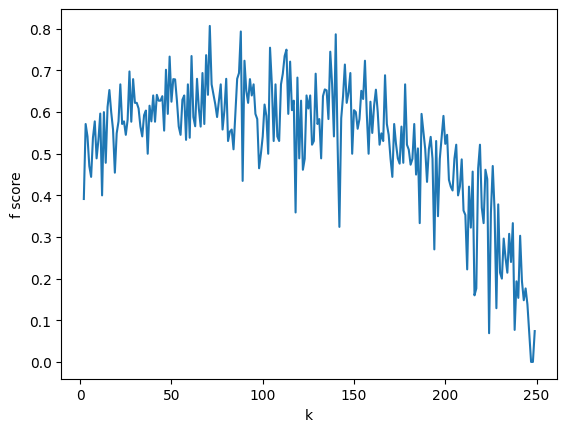

In [18]:
from sklearn.metrics import precision_recall_fscore_support

def get_scores(k):
  # Use knn on age. First create a nearest neighbors object.
  nn = NearestNeighbors(n_neighbors=k, metric='euclidean', algorithm='auto')

  # This builds an index data structure under the hood for query performance
  X = df[['age_s', 'trestbps_s']].values
  fit = nn.fit(X)

  # Get random patients to test on
  n = 50
  patients = df.sample(n)
  patientsX = patients[['age_s','trestbps_s']].values
  patientsy = patients[['disease']].values
  # display(patients)

  # Find the k nearest neighbors to the patient.
  distances, indices = fit.kneighbors(patientsX)
  # print('indices of k-nearest neighbors for each patient:')
  # display(indices)

  y_pred = []
  for i in range(n):
      # print('nearest neighbors to patient: {}:'.format(patientsX[i]))
      nbrs = df.iloc[indices[i]]
      # Drop the patient of interest
      nbrs = nbrs.drop(patients.index[i], errors='ignore')
      # display(nbrs)

      healthy = nbrs[nbrs.disease == 0].count().disease
      sick = nbrs[nbrs.disease == 1].count().disease
      predict = 0 if (healthy > sick) else 1
      # print(f'healthy: {healthy}, sick: {sick}, predicted: {predict}, actual: {patientsy[i][0]}')
      y_pred.append(predict)

  # This is where we would compile how many patients are predicted
  # correctly. Remember:
  #    precision = tp/(tp+fp)  ("sloppiness")
  #    recall    = tp/(tp+fn)  ("What percentage did we find?")
  #    f-score - a balance between precision and recall
  #    support - number of positive labels
  return precision_recall_fscore_support(patientsy, y_pred, labels=[1])

kvals = range(2, 250)
scores = [get_scores(k) for k in kvals]
# print(scores)

scores = [(p[0], r[0], f[0], s[0]) for (p,r,f,s) in scores]
scores = list(zip(*scores))

plt.plot(kvals, scores[2])
plt.xlabel('k')
plt.ylabel('f score')

# Split data into train/test and get precision/recall/f score

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support

k = 20
nn = NearestNeighbors(n_neighbors=k, metric='euclidean', algorithm='auto')

X = df[['age', 'trestbps', 'chol', 'thalach']].values
y = df[['disease']].values

# Use random_state if you want the same values each time you run for debugging,
# but you should select the split randomly when you're ready to actually train
# and test on the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)#, random_state=42)

# Build the model with the training data and test with the test data

# You may also want to use this function to compute the f score. The labels parameter indicates
# that label 1 is "positive" in the sense of "true positive", "false positive" etc.
# (p,r,f,s) = precision_recall_fscore_support(y_test, y_pred, labels=[1])

# Curse of dimensionality
"In low-dimensional datasets, the closest points tend to be much closer than average. But two points are close only if they're close in every dimension, and every extra dimension -- even if just noise -- is another opportunity for each point to be further away from every other point. When you have a lot of dimensions it's likely that the closest points aren't much closer than average, which means that two points being close doesn't mean very much (unless there is a *lot* of structure in your data)." -Joel Grus

The chart that this code displays shows that distance has less meaning as dimensions grows. In higher dimensions, most points are about the same distance from each other.

[0.006420977540344652, 0.9890274830609121, 0.25955596334016684]
[1.5087045900847633, 1.1090660746112353, 1.5938599445802866, 0.8473163770354483, 1.4001744878842135, 1.4166294570503286, 1.5408624408243592, 1.4190179092867912, 1.3697376899672569, 1.7950179137945674]


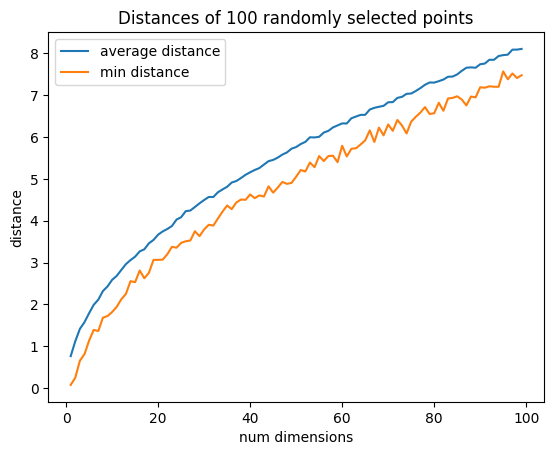

In [17]:
import random
import math

def random_point(dim):
    return [random.random() for _ in range(dim)]

def sq(x):
    return x*x

def distance(a, b):
    a = [sq(a[i]) + sq(b[i]) for i in range(len(a))]
    return math.sqrt(sum(a))

def random_distances(dim, num_pairs):
    return [distance(random_point(dim), random_point(dim)) for _ in range(num_pairs)]

print(random_point(3))
print(random_distances(3, 10))

num_pairs = 100
means = []
mins = []
for dim in range(1, 100):
    d = random_distances(dim, num_pairs)
    means.append(sum(d)/len(d))
    mins.append(min(d))

# Note that the ratio of average distance to min distance
# approaches one, so there's less space between the two.
plt.plot(range(1, 100), means, label='average distance')
plt.plot(range(1, 100), mins, label='min distance')
plt.xlabel('num dimensions')
plt.ylabel('distance')
plt.title('Distances of 100 randomly selected points')
plt.legend()